# Testing Procedure for Super Resolution

This notebook is an illsutration of the numerical experiments performed in the paper entitled
"Testing Gaussian Process with Applications to Super-Resolution" by Jean-Marc Azaïs and Yohann De Castro

## Python code

The Python code can be downloaded at 

https://github.com/ydecastro/super-resolution-testing

The file 'aux.py' contains all the auxilliary functions. The file 'testing_superresolution.py' is illustrated in this notebook. 

It requires at most:

python>=3.6.4

numpy>=1.14.0

scipy>=1.0.0

matplotlib>=2.1.2

seaborn>=0.8.1

## Getting started

Once you have downloaded the two files testing_superresolution.py and aux.py, you can execute testing_superresolution.py to make the numerical experiments of the paper. This notebook is an illustration of this code. It should take you between 15 to 30min to run all the experiments below.

## testing_superresolution.py

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from aux import generate_stat, generate_tstat

We begin by setting the parameters

In [2]:
sample_size     = 5
sparsity        = 0 
amplitude       = 0
sigma           = 1
iterations      = 100

Here we are under the null $Z=0$ and there is no signal at all, only noise. We took $f_c=5$ so we observe the frequencies between $-5$ and $5$. The noise level is $\sigma=1$. In the paper we did $5000$ iterations but for sake of rapidity we chose to present only $100$ montcarlo experiments. It may take several minutes for each experiments, so please be patient.

In [3]:
emp = np.zeros(iterations)

for k in range(0,iterations):    
    temp   = generate_stat(sample_size, sparsity, amplitude, sigma)     
    emp[k] = temp

np.save('fig1_1', [emp, sample_size, sparsity, amplitude, sigma, iterations])

We continue with the distribution of $S$ under an alternative $\log N$. We have one spike of size $\log N$ located at a random point of $[0,2\pi)$. The testing statistics is given by

 $$
 S_{\mathrm{SR}}^{\mathrm{Rice}} =\frac{\sigma (\alpha_1 \lambda_1 + \alpha_2) \phi(\lambda_1/\sigma) + (\alpha_1 \sigma^2- \alpha_3^2) \overline{\Phi}(\lambda_1/\sigma)  }{\sigma (\alpha_1 \lambda_2 + \alpha_2) \phi(\lambda_2/\sigma) + (\alpha_1 \sigma^2- \alpha_3^2) \overline{\Phi}(\lambda_2/\sigma)} \sim \mathcal U([0,1]),
  $$
  
which is uniformly distributed under the null. The value of $S$ is taken as the p-value of the test. We denote by 

  $$
  \left\{ \begin{array}{l}
  \alpha_1 = \frac{1}{3} f_c (f_c + 1), \\
  \alpha_2 = \frac{1}{\sqrt{N}} \sum\limits_{k=-f_c}^{f_c} (k^2 - \alpha_1) \times \mathrm{Re}(y_{k} e^{\imath (k \hat{t} - \hat{\theta})}),  \\
  \alpha_3 = \frac{1}{\sqrt{N}} \sum\limits_{k=-f_c}^{f_c} k \times \mathrm{Re}(y_{k} e^{\imath (k \hat{t} - \hat{\theta})}).
  \end{array} \right.
  $$
  
and $\lambda_1$, $\lambda_2$ the first knots of the BLASSO (or the 'Continuous LARS' as presented in the paper). We denote by $\phi$ and $\bar \Phi$ the pdf and survival function of the standard normal.

In [4]:
sparsity        = 1 
amplitude       = np.log(2*sample_size+1)

emp2 = np.zeros(iterations)

for k in range(0,iterations):    
    temp   = generate_stat(sample_size, sparsity, amplitude, sigma)     
    emp2[k] = temp

np.save('fig1_2', [emp2, sample_size, sparsity, amplitude, sigma, iterations])

We continue with the distribution of S under the alternative $\sqrt{N}$.

In [5]:
sparsity        = 1 
amplitude       = np.sqrt(2*sample_size+1)

emp3 = np.zeros(iterations)

for k in range(0,iterations):    
    temp   = generate_stat(sample_size, sparsity, amplitude, sigma)     
    emp3[k] = temp

np.save('fig1_3', [emp3, sample_size, sparsity, amplitude, sigma, iterations])

We plot the results as in the paper (please see Fig. 6).

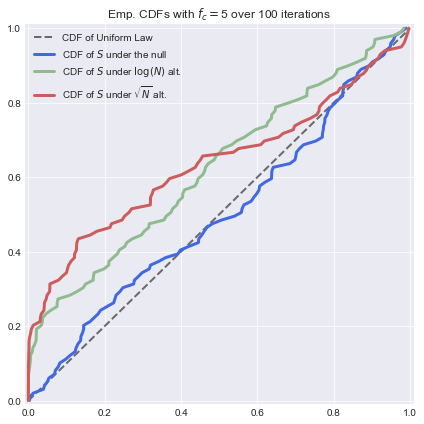

In [6]:
sns.set_style("dark")
a =emp
b =emp2
c =emp3
plt.figure(figsize=(6,6))
x = np.linspace(0,1,2000)
plt.plot(x, x, color="dimgray", linestyle="--", lw=2)
plt.plot(np.sort(a), np.linspace(0, 1, len(a)), color="royalblue", lw=3)
plt.plot(np.sort(b), np.linspace(0, 1, len(b)), color="darkseagreen", lw=3)
plt.plot(np.sort(c), np.linspace(0, 1, len(c)), color="indianred", lw=3)
plt.grid()
plt.xlim(-0.01,1.01)
plt.ylim(-0.01,1.01)
plt.legend(["CDF of Uniform Law", "CDF of $S$ under the null",\
            "CDF of $S$ under $\log(N)$ alt.", "CDF of $S$ under $\sqrt{N}$ alt."])
plt.title ("Emp. CDFs with $f_c=$%s over %s iterations" %(sample_size, iterations))
plt.tight_layout()
plt.savefig('fig1.png', format='png', dpi=300)
plt.show()

We can perform the same experiments when the noise level is unknown. In this case, one can use the following testing strategy:
$$
 T_{\mathrm{SR}}^{\mathrm{Rice}} =\frac{\alpha_1 \overline{F}_{m-3}(T_1) + (\alpha_1 T_1 + \alpha_2) f_{m-3}(T_1) - \gamma_m^{-1} \alpha_3^2 \overline{F}_{m-1}(T_1)  }{\alpha_1 \overline{F}_{m-3}(T_2) + (\alpha_1 T_2 + \alpha_2) f_{m-3}(T_2) - \gamma_m^{-1} \alpha_3^2 \overline{F}_{m-1}(T_2)} \sim \mathcal U([0,1]),
  $$
  
where  $F_{d}$ is the Student cumulative distribution function with $d$ degrees of freedom, $ \overline  F _{d}  = 1-F_{d} $ its survival function, $f_d$ its density function, $T_1 = \lambda_1/\widehat{\sigma}_{|}$, $T_2 = \lambda_2/\widehat{\sigma}_{|}$, $\widehat{\sigma}_{|}$ is defined in the paper and $ \gamma_m = \frac{m-3}{m-2} \frac{\bar{\Gamma}\left(\frac{m}{2}\right)\bar{\Gamma}\left(\frac{m-3}{2}\right)}{\bar{\Gamma}\left(\frac{m-1}{2}\right)\bar{\Gamma}\left(\frac{m-2}{2}\right)} $.

The estimation $\widehat{\sigma}_{|}$ appears line 451 in aux.py.


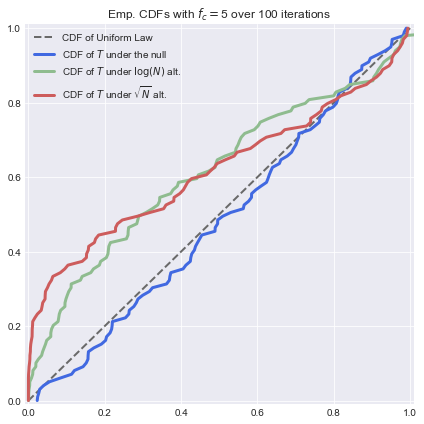

In [7]:
"""
We begin with the distribution of T under the null
"""
sparsity        = 0 
amplitude       = 0

emp = np.zeros(iterations)
var_emp = np.zeros(iterations)

for k in range(0,iterations):    
    temp   = generate_tstat(sample_size, sparsity, amplitude, sigma)     
    emp[k] = temp[0]
    var_emp[k] = temp[1]

np.save('fig2_1', [emp, var_emp, sample_size, sparsity, amplitude, sigma, iterations])

"""
We continue with the distribution of S under an alternative 
"""

sparsity        = 1 
amplitude       = np.log(2*sample_size+1)

emp2 = np.zeros(iterations)
var_emp2 = np.zeros(iterations)

for k in range(0,iterations):    
    temp   = generate_tstat(sample_size, sparsity, amplitude, sigma)     
    emp2[k] = temp[0]
    var_emp2[k] = temp[1]

np.save('fig2_2', [emp2, var_emp2, sample_size, sparsity, amplitude, sigma, iterations])

"""
We continue with the distribution of S under an other alternative 
"""

sparsity        = 1 
amplitude       = np.sqrt(2*sample_size+1)

emp3 = np.zeros(iterations)
var_emp3 = np.zeros(iterations)

for k in range(0,iterations):    
    temp   = generate_tstat(sample_size, sparsity, amplitude, sigma)     
    emp3[k] = temp[0]
    var_emp3[k] = temp[1]

np.save('fig2_3', [emp3, var_emp3, sample_size, sparsity, amplitude, sigma, iterations])

"""
We plot the results 
"""

#%
sns.set_style("dark")
a =emp
b =emp2
c =emp3
plt.figure(figsize=(6,6))
x = np.linspace(0,1,2000)
plt.plot(x, x, color="dimgray", linestyle="--", lw=2)
plt.plot(np.sort(a), np.linspace(0, 1, len(a)), color="royalblue", lw=3)
plt.plot(np.sort(b), np.linspace(0, 1, len(b)), color="darkseagreen", lw=3)
plt.plot(np.sort(c), np.linspace(0, 1, len(c)), color="indianred", lw=3)
plt.grid()
plt.xlim(-0.01,1.01)
plt.ylim(-0.01,1.01)
plt.legend(["CDF of Uniform Law", "CDF of $T$ under the null",\
            "CDF of $T$ under $\log(N)$ alt.", "CDF of $T$ under $\sqrt{N}$ alt."])
plt.title ("Emp. CDFs with $f_c=$%s over %s iterations" %(sample_size, iterations))
plt.tight_layout()
plt.savefig('fig2.png', format='png', dpi=300)
plt.show()

Thank you for your time!